# Taxonomy Classification Model (Label Spreading)

## Import Notebook

In [1]:
%run notebook_model_ls.ipynb
%run notebook_model_lstm.ipynb

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2024-09-27 00:26:57.653429: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## ASRS Data Source

In [7]:
options={ "is_merge_taxonomy": True }
# 01. Get Data
asrs_df = CoreUtils.get_data('asrs', from_year=2000, to_year=2023)
# asrs_df['finding_description'].value_counts()

asrs_df['finding_description'].to_csv('./test.csv')
asrs_df
# # 02. Label Spreading
# asrs_modelLS = ModelLS({'asrs': asrs_df}, 'asrs', 20000, options=options)
# asrs_modelLS.train()

,event_id,date,finding_factor,finding_description,narrative_01,narrative_02
82408,458885,2000-01-01,Human Factors,Human Factors-Human Factors; Logbook Entry; Ai...,I HAVE DISCOVERED THAT MY AIRLINE IS IN VIOLAT...,NaN
82409,458992,2000-01-01,Human Factors,Weather-Human Factors; Weather; Airport; Envir...,POSSIBLE LNDG BELOW MINIMUMS AT NIGHT. PVD ARP...,NaN
82410,459003,2000-01-01,ATC Equipment / Nav Facility / Buildings,ATC Equipment / Nav Facility / Buildings-ATC E...,AN ACR DEPARTED MIA DURING A PERIOD OF HVY TFC...,NaN
82411,459005,2000-01-01,Aircraft-Aircraft systems,Aircraft-Aircraft,DURING GEAR RETRACTION ON TKOF; THE NOSE DOOR ...,NaN
82412,459007,2000-01-01,Weather,Aircraft-Weather; Aircraft,AFTER DEPARTING LAS WE WERE ON A RADAR VECTOR ...,NaN
...,...,...,...,...,...,...
221000,2073169,2023-12-01,Training / Qualification,Human Factors-Human Factors-Training / Qualifi...,I recently filmed some drone footage at sunset...,NaN
221005,2073637,2023-10-01,Weather,Company Policy-Weather; Company Policy; Airpor...,I am submitting this report for informational ...,NaN
221006,2074640,2023-12-01,Communication Breakdown,Ambiguous-Aircraft; Environment - Non Weather ...,On the night of Day 0 the fire district was re...,NaN
221007,2074779,2023-12-01,Communication Breakdown,Human Factors-Human Factors; Procedure; Softwa...,I was on break when this occurred and is my un...,NaN


## NTSB Dats Source

AutoLabeling sample_size= (18537, 6)
finding_factor


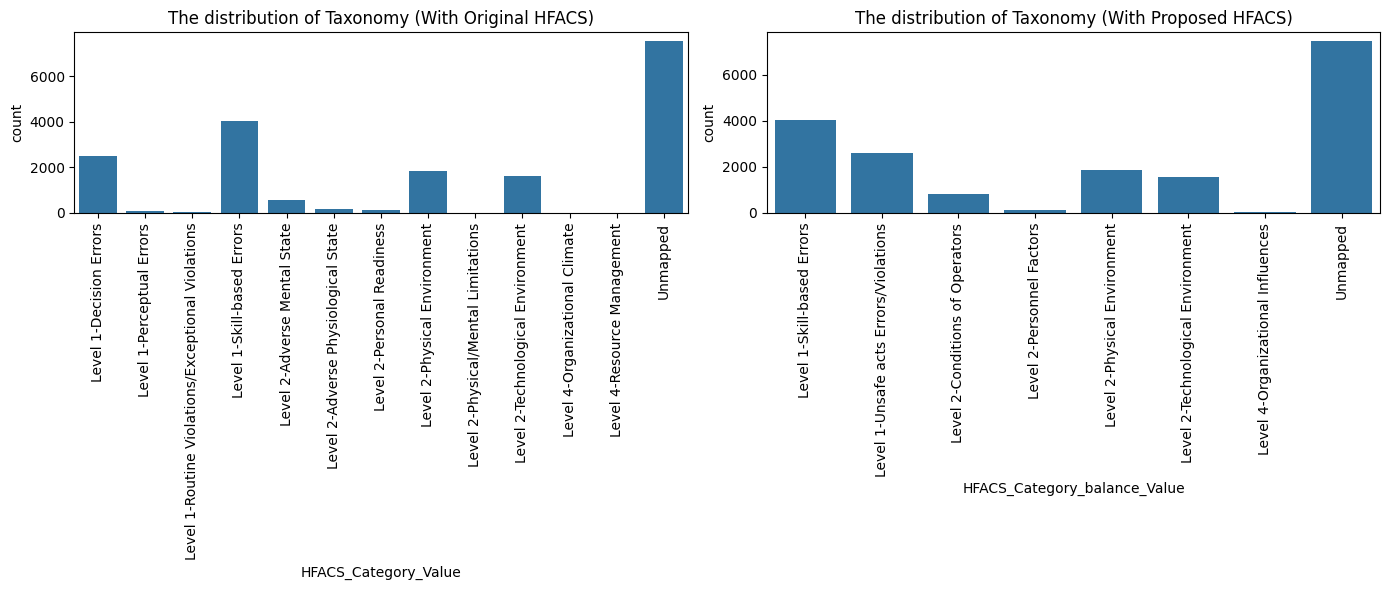

Shape of label tensor: (18537,)
Accuracy on test data: 1.0


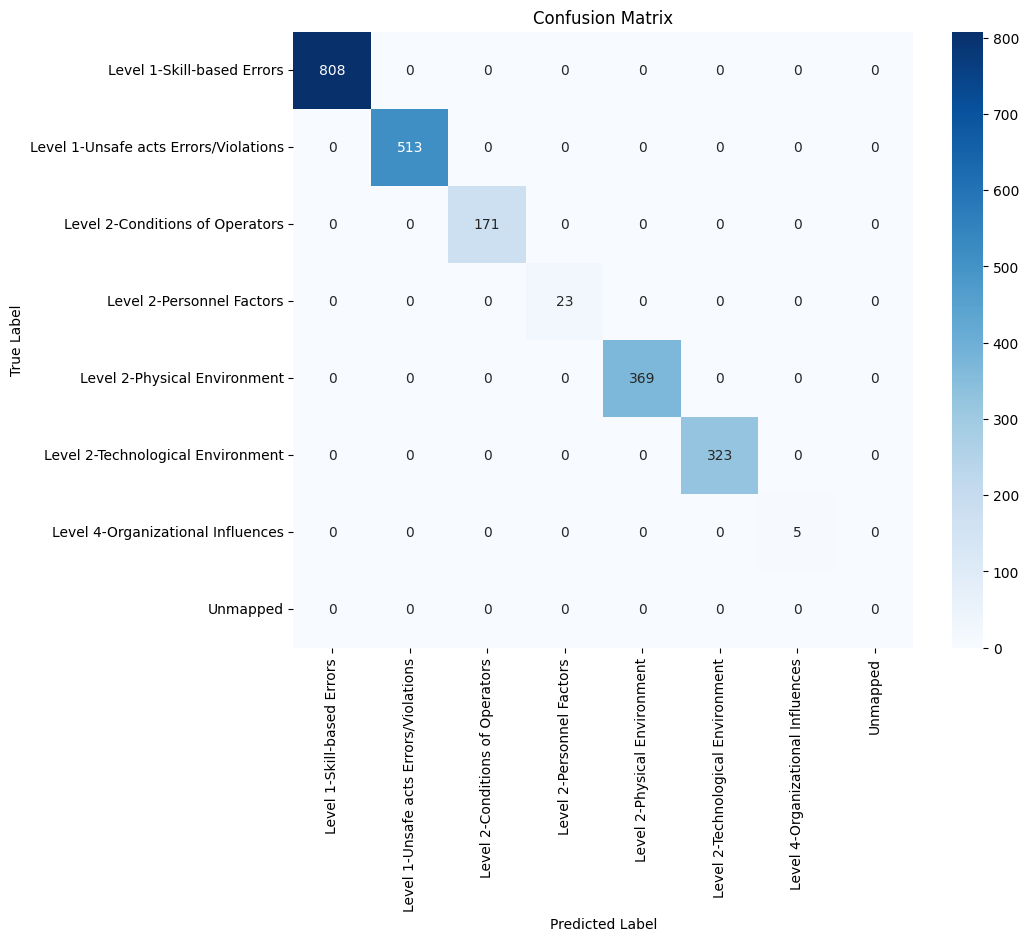

ntsb Model and vectorizer saved successfully


In [39]:
options={ "is_merge_taxonomy": True }
# 01. Get Data
ntsb_df = CoreUtils.get_data('ntsb', from_year=2000, to_year=2023)


ntsb_modelLS = ModelLS({'ntsb': ntsb_df}, 'ntsb', 20000, options=options)
ntsb_modelLS.train()

## ASRS + NTSB 

AutoLabeling sample_size= (10000, 6)
finding_factor


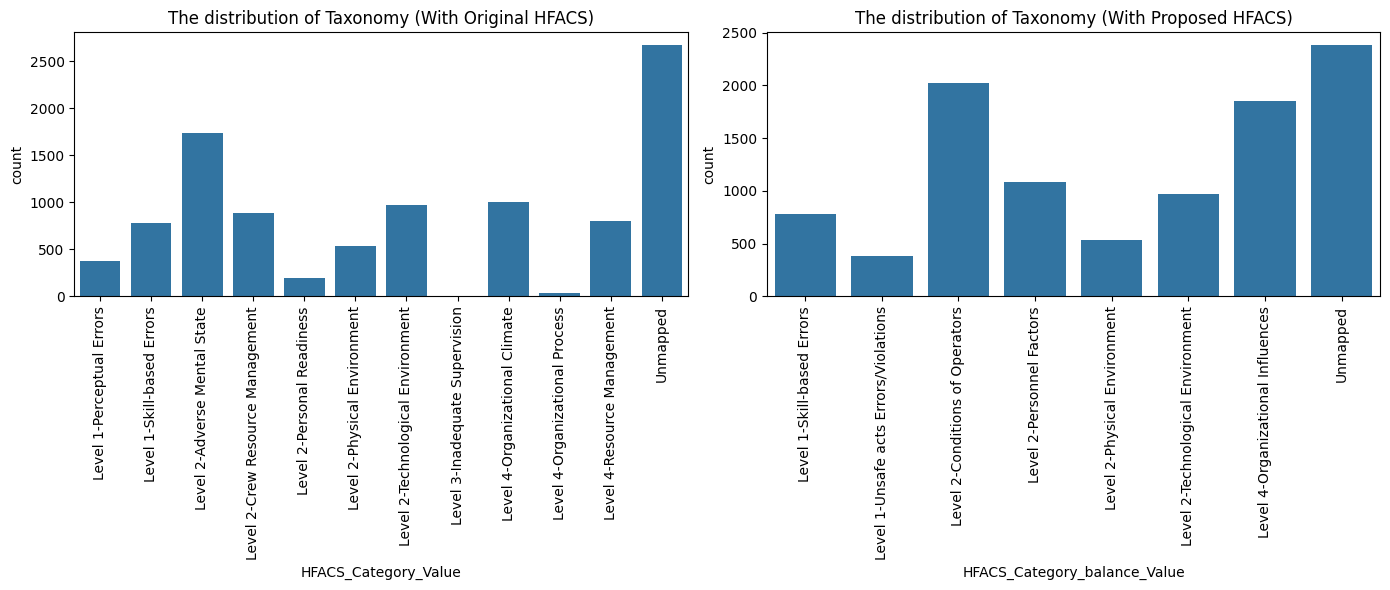

AutoLabeling sample_size= (10000, 6)
finding_factor


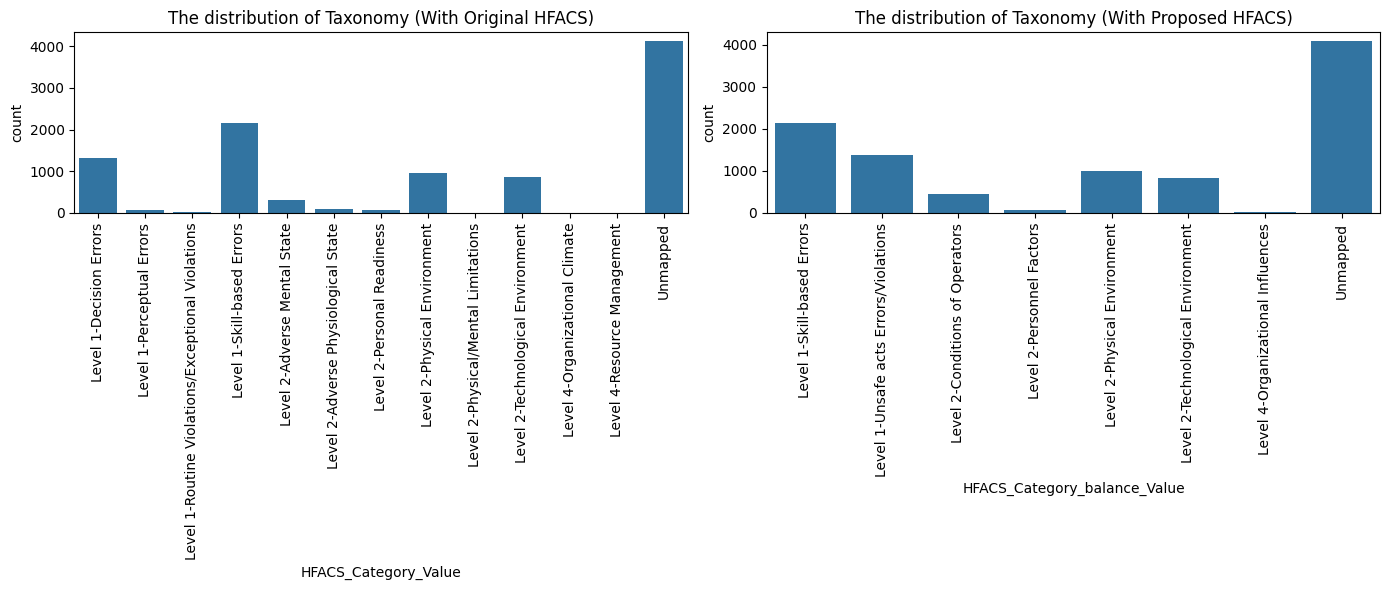

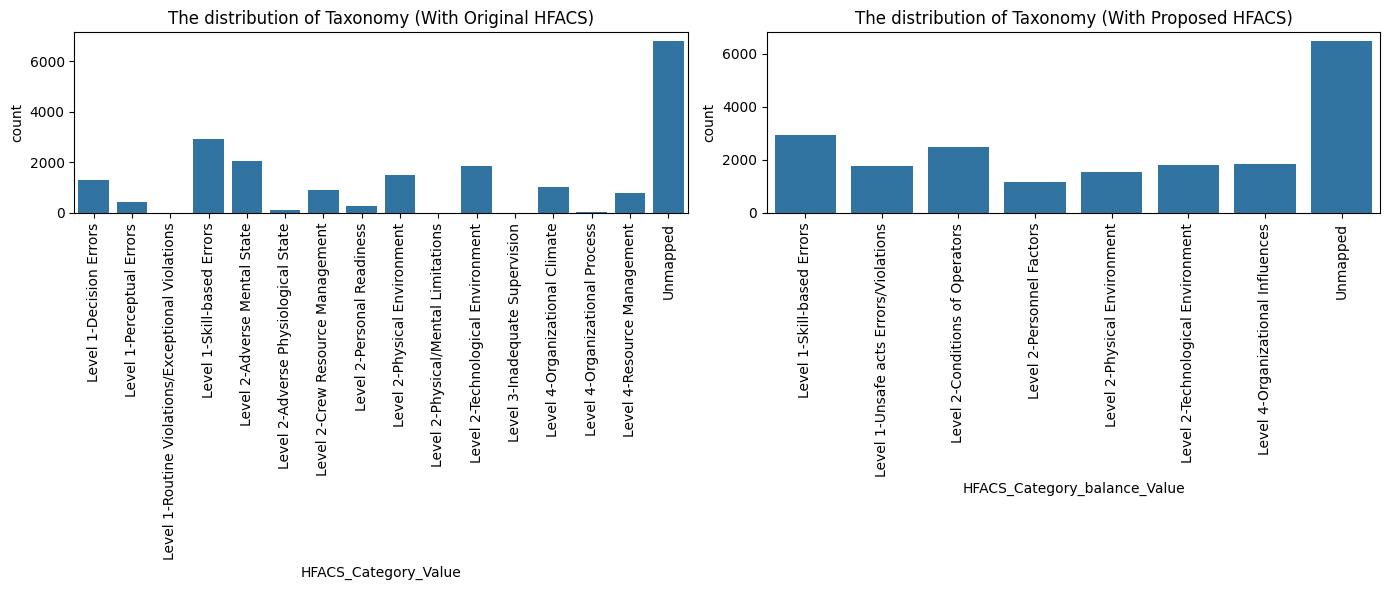

Shape of label tensor: (20000,)
Accuracy on test data: 0.9582255083179297


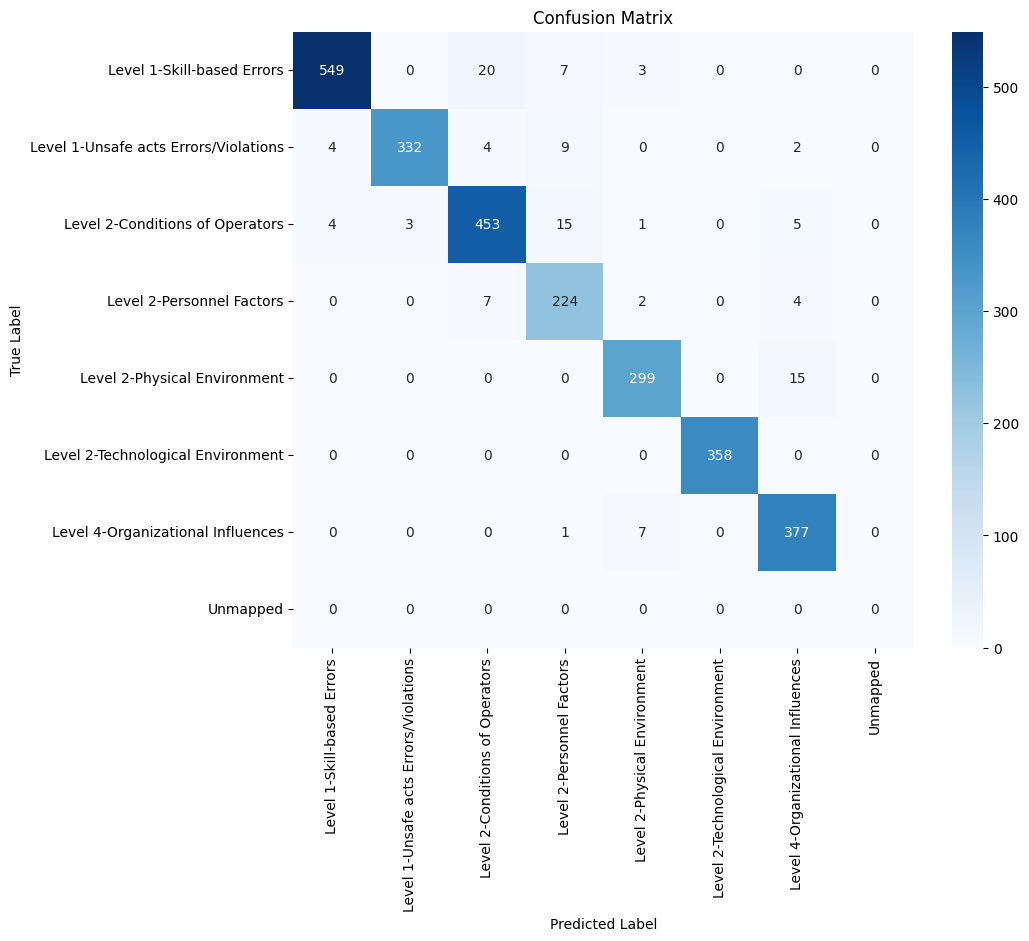

asrs_ntsb Model and vectorizer saved successfully


In [40]:
options={ "is_merge_taxonomy": True }
# 01. Manual Labeling with specific sample
asrs_df = CoreUtils.get_data('asrs', from_year=2000, to_year=2023)
ntsb_df = CoreUtils.get_data('ntsb', from_year=2000, to_year=2023)

asrs_ntsb_modelLS = ModelLS({'asrs': asrs_df, 'ntsb': ntsb_df}, 'asrs_ntsb', 10000, options=options)
asrs_ntsb_modelLS.train()